Video FPS: 30.0
Total frames: 5699


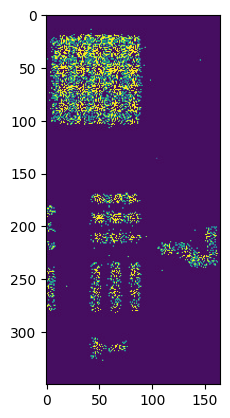

Extraction complete. Total frames extracted: 1


error: OpenCV(4.10.0) /io/opencv/modules/imgproc/src/color.cpp:196: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


In [8]:
import cv2
import os
import argparse
from hyperscope import config

video_path = config.PROCESSED_DATA_DIR / 'videos' / 'reschart.avi'

    
# Open the video file
video = cv2.VideoCapture(video_path)

# Check if video opened successfully
if not video.isOpened():
    raise(ValueError('video didnt open'))
# Get video properties
fps = video.get(cv2.CAP_PROP_FPS)
frame_count = int(video.get(cv2.CAP_PROP_FRAME_COUNT))

print(f"Video FPS: {fps}")
print(f"Total frames: {frame_count}")

frame_number = 0
x1, y1, x2, y2 = 265, 50, 430, 400
while True:
    # Read a frame from the video
    success, frame = video.read()
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY).astype(np.float32)
    # If frame is read correctly, save it
    if success:
        frame /= frame.max()
        frame = frame[y1:y2, x1:x2]
        plt.imshow(frame)
        plt.show()
        plt.close()
        frame_number += 1
        
        # Print progress
        if frame_number % 100 == 0:
            print(f"Extracted {frame_number} frames")
    else:
        # Break the loop if we can't read any more frames
        break
    
    # Release the video capture object
    video.release()
    
    print(f"Extraction complete. Total frames extracted: {frame_number}")

